| Technological Institute of the Philippines | Quezon City - Computer Engineering                                      |
| ------------------------------------------ | ----------------------------------------------------------------------- |
| Course Code:                               | CPE 313                                                                 |
| Code Title:                                | Advanced Machine Learning and Deep Learning                             |
| 1st Semester                               | AY 2023-2024                                                            |
| <hr>                                       | <hr>                                                                    |
| <u>**ACTIVITY NO.**                        | **Performing Face Recognition**                                         |
| **Name**                                   | Estacion, Kenneth                                                       |
| **Section**                                | CPE32S8                                                                 |
| **Date Performed**:                        | Feb. 20, 2024                                                           |
| **Date Submitted**:                        | Feb. 20, 2024                                                           |
| **Instructor**:                            | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard |

<hr>


## 1. Objectives


This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.


## 2. Intended Learning Outcomes (ILOs)

After this activity, the students should be able to:

- Utilize data preparation techniques for images.
- Perform Face Recognition using multiple algorithms.
- Evaluate the performance of different algorithms.


## 3. Procedures and Outputs


### Preparing the training data


Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.


**Include a Screenshot of Your Dataset Here**


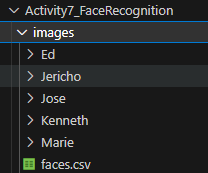


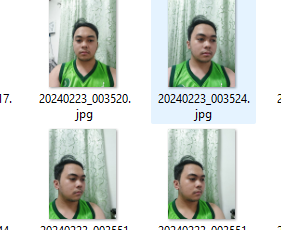


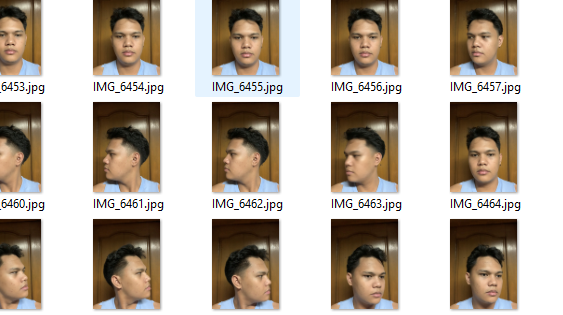


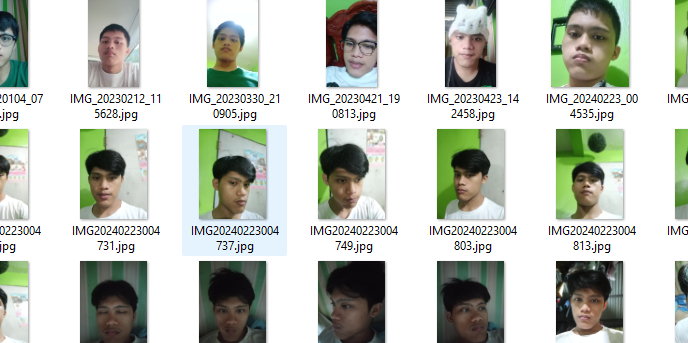


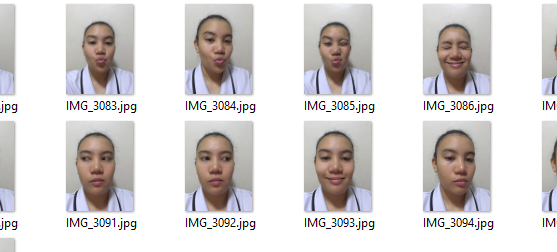


---


### Loading the data and recognizing faces


Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.


In [1]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [2]:
path = 'images'
[X,y] = read_images(path,sz=200)

In [11]:
for i in range(4):
    print(i,':',y.count(i))
y = np.asarray(y, dtype=np.int32)
print(y)

0 : 43
1 : 40
2 : 46
3 : 15
4 : 0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


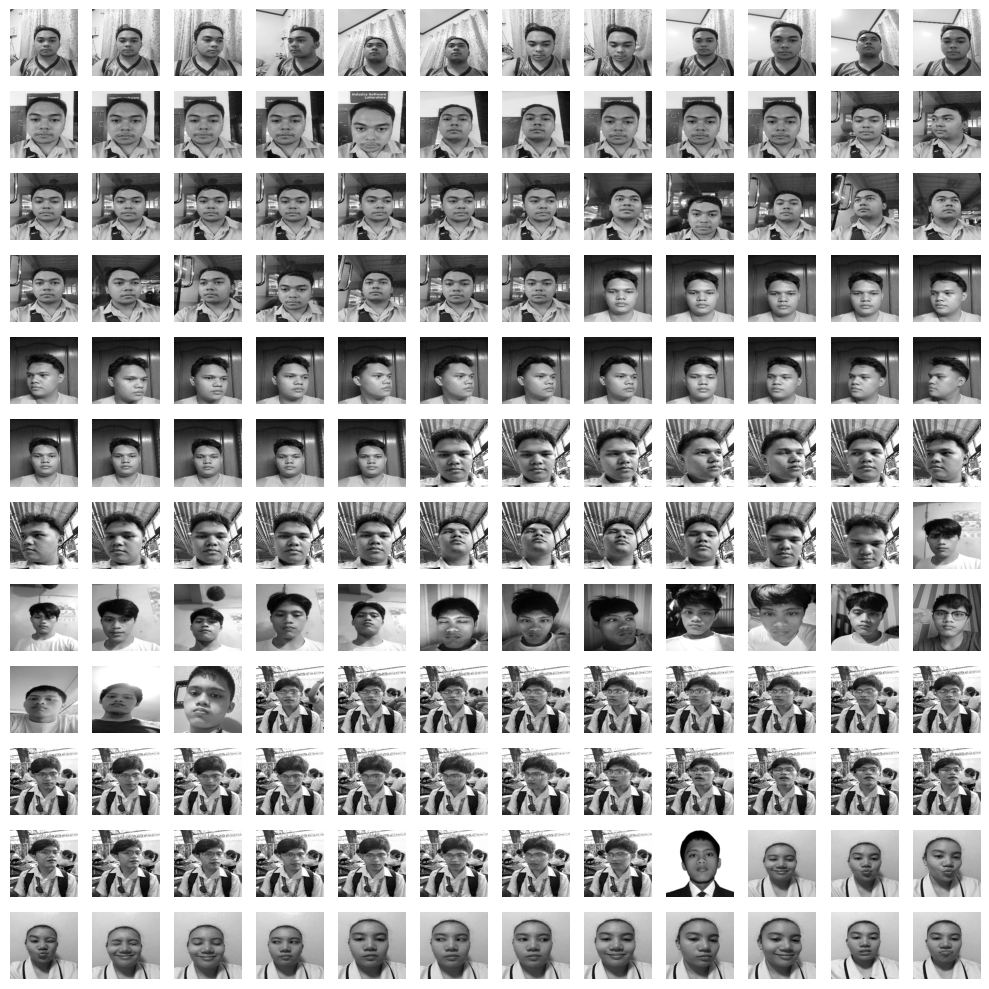

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
num_images = len(X)
row_num = int(np.ceil(np.sqrt(num_images)))
col_num = int(np.ceil(num_images / row_num))
fig, axes = plt.subplots(row_num, col_num, figsize=(10, 10))
axes = axes.flatten()
for i, img in enumerate(X):
    axes[i].imshow(img,cmap='gray')
    axes[i].axis('off')
plt.tight_layout()

Ed have 17 images

Jericho have 33 images

Jose have 7 images

Kenneth have 23 images

Marie have 15 images


**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**


I created a faces.csv to store all the location of the files and their respective id. However, later in the code, the csv was not even used. I'll just use it to store them directly so that I can skip the long process of reading the images.

It is also a struggle trying to read the directories needed with this code especially that I thought the csv will be used. The filepath and filenames variables were not even used. Nonetheless, I was able to run the read_images function as I solidified my understanding of the structure of my code and my directories.

---


### Performing Face Recognition Algorithms


Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:

- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition


In [11]:
names = ['Ed','Jericho','Kenneth','Marie']

In [6]:
def face_rec():
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X,y] = read_images(path,sz=200)
  y = np.asarray(y, dtype=np.int32)
  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.5, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**


I always get a problem regarding the xml file as they are being unable to read. I tried reinstalling my opencv, tried to run in python file, and redownload the xml. I am not sure which one solved it but it worked.

A model was created with EigenFaceRecognizer_create. This is feed with all our images in the dataset. Next, The code use my camera to film me. In each video frame, the function detect MultiScale was called to detect the locations of the faces present in the frame. A box is inserted aroound it. Then, it tries to predict the face of the images based on the model created previously.

Upon executing, I have to go near to my camera to detect my face. Then, a box in my face was displayed with my name and some number. However, I noticed that sometimes it change to a different name when I move to certain angles. This is the same with using the faces in my dataset. Using more images will increase the accuracy of the model and alleviate this issue.


---

Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`


In [7]:
#model = cv2.face.createLBPHFaceRecognizer()
def face_rec():
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(path,sz=200)
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.LBPHFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


In [8]:
#model = cv2.face.createFisherFaceRecognizer()`
def face_rec():
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(path,sz=200)
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.FisherFaceRecognizer.create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**


The model predicts the detected face based on the images in the dataset. We have 5 different faces each having a different label from 0 to 4. The detected face will be pe processed and the model will predict which of the 5 faces it most closely resembles to. The second element is the confidence level that dictates how closely related the detected face based on the label's set of images. Confidence level is important in the model's reliablity in predicting faces.


## 4. Supplementary Activity


Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:

1. Create a new dataset for testing, this dataset must include the following:

- The same person/s that the model has to recognize.
- Different person/s that the model should not recognize.

2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.


In [ ]:
[X,y] = read_images(path,sz=200)
X




































































































































































































































































[array([[192, 189, 186, ..., 133, 152, 154],
        [187, 185, 184, ..., 162, 158, 163],
        [186, 184, 173, ..., 159, 158, 161],
        ...,
        [197, 195, 194, ..., 173, 175, 176],
        [193, 196, 190, ..., 174, 174, 177],
        [193, 197, 198, ..., 169, 172, 172]], dtype=uint8),
 array([[179, 182, 172, ..., 137, 162, 147],
        [179, 169, 145, ..., 171, 157, 155],
        [166, 125,  75, ..., 161, 162, 158],
        ...,
        [195, 195, 190, ..., 175, 178, 179],
        [197, 195, 193, ..., 175, 179, 178],
        [192, 199, 196, ..., 174, 177, 180]], dtype=uint8),
 array([[174, 236, 228, ..., 243, 239, 226],
        [231, 158, 230, ..., 236, 232, 237],
        [229, 169, 227, ..., 255, 255, 232],
        ...,
        [162, 158, 141, ..., 179, 181, 178],
        [159, 150, 132, ..., 179, 182, 182],
        [151, 139, 131, ..., 182, 180, 175]], dtype=uint8),
 array([[194, 192, 195, ..., 213, 212, 209],
        [190, 193, 195, ..., 219, 214, 210],
        [190, 19

In [ ]:
import pandas as pd
df = pd.DataFrame([X,y]).T
df.columns = ['X','y']
df[y] = df[y].astype(int)
recognize = df[df[y].isin([0,1])]
not_recognize = df[df[y].isin([2,3,4])]
df

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,\n       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n       1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,\n       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],\n      dtype='int32')] are in the [columns]"

In [ ]:
not_recognize[1].value_counts()

1
3    23
4    15
2     7
Name: count, dtype: int64

In [ ]:
recognize[1].value_counts()

1
1    33
0    17
Name: count, dtype: int64

In [ ]:
not_recognize_x = np.array(not_recognize.)
not_recognize_y = np.array(not_recognize[1])
recognize_x = np.array(recognize[0])
recognize_y = np.array(recognize[1])

In [ ]:
not_recognize_x

array([array([[255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              [255, 255, 255, ..., 255, 255, 255],
              ...,
              [ 43,  66,  74, ...,  28,  12,   0],
              [ 27,  56,  72, ...,  21,   0,  14],
              [ 21,  40,  71, ...,   9,   0,  16]], dtype=uint8), 2],
      dtype=object)

## 5. Summary, Conclusions and Lessons Learned


<hr/>

**_Proprietary Clause_**

_Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P._
